In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats



In [2]:
df = pd.read_csv("Solapur.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,WS50M,RH2M,PS
0,2011,4,1,5,20.89,0.0,5.45,29.81,95.45
1,2011,4,1,6,22.65,0.0,4.56,26.75,95.53
2,2011,4,1,7,26.19,0.0,3.39,21.19,95.62
3,2011,4,1,8,31.99,0.0,4.00,13.12,95.66
4,2011,4,1,9,34.87,0.0,3.01,11.19,95.66
...,...,...,...,...,...,...,...,...,...
87667,2021,4,1,0,24.43,0.0,9.83,32.38,95.03
87668,2021,4,1,1,23.72,0.0,9.33,42.56,95.01
87669,2021,4,1,2,23.22,0.0,8.53,50.50,94.98
87670,2021,4,1,3,22.69,0.0,7.67,56.00,94.99


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 9
Discrete feature Count 4
Continuous feature Count 5
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
HR             0.0
T2M            0.0
PRECTOTCORR    0.0
WS50M          0.0
RH2M           0.0
PS             0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'HR', 'T2M', 'PRECTOTCORR', 'WS50M', 'RH2M', 'PS']


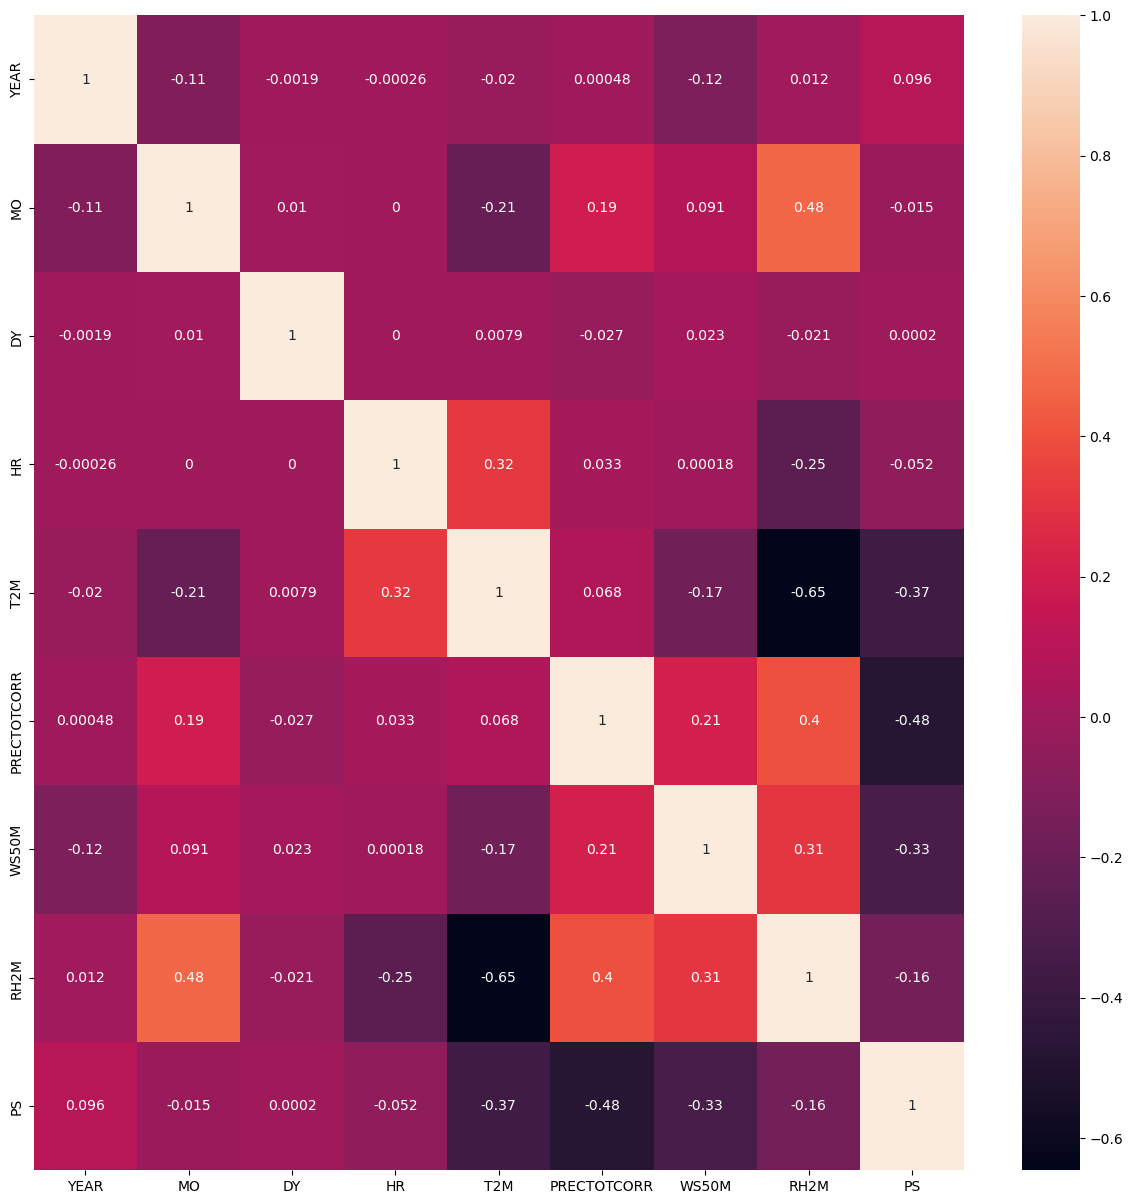

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

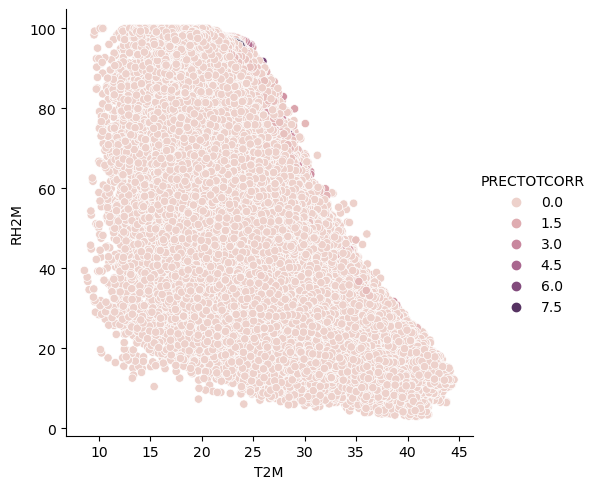

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


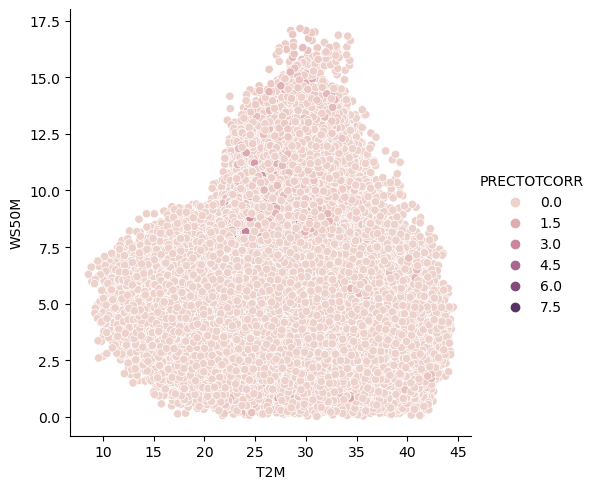

In [9]:
sns.relplot(x='T2M',y='WS50M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


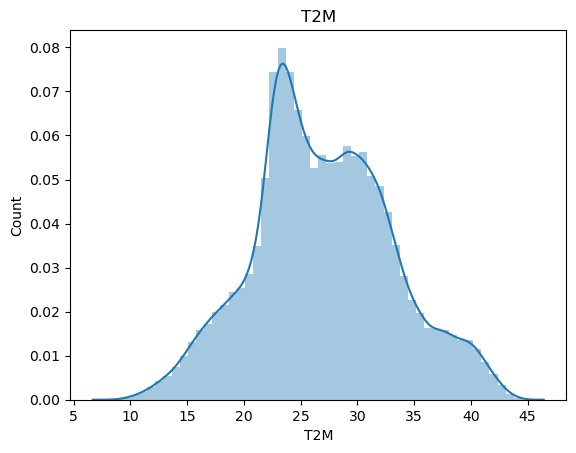

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


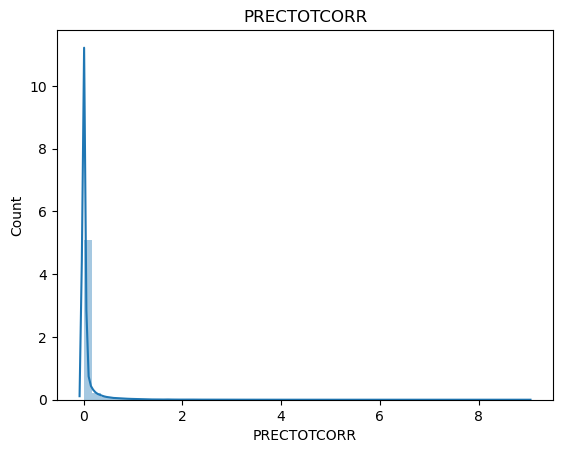

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


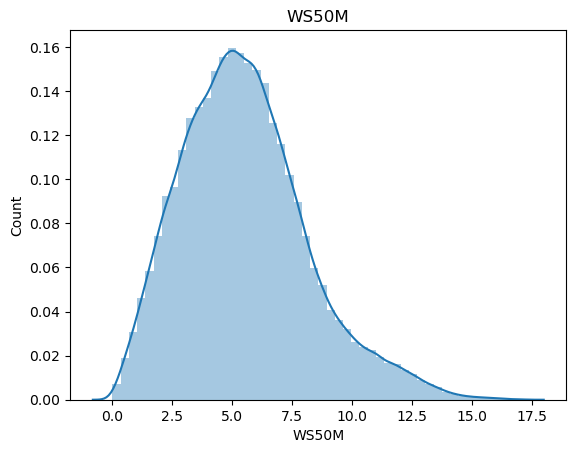

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


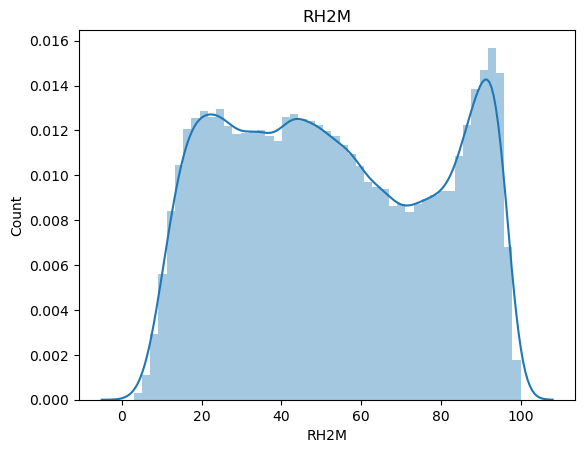

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


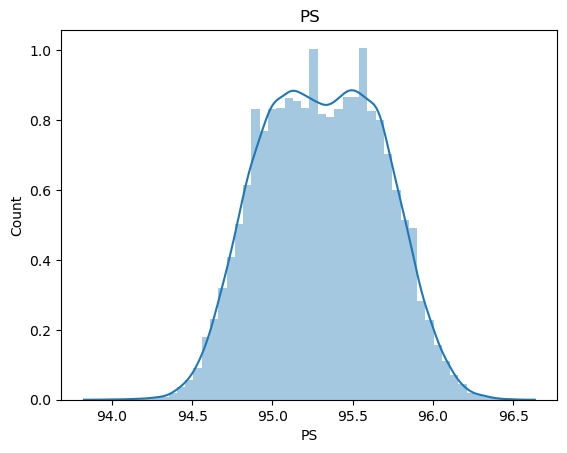

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

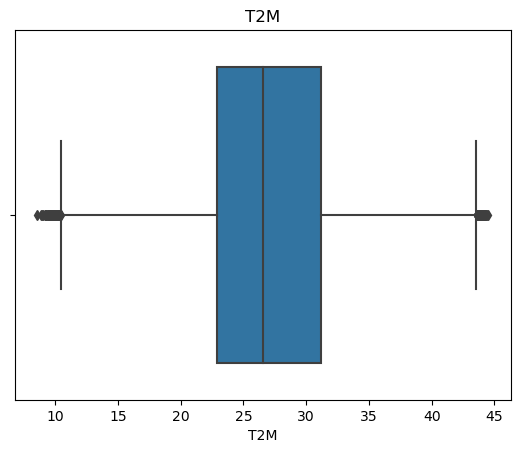

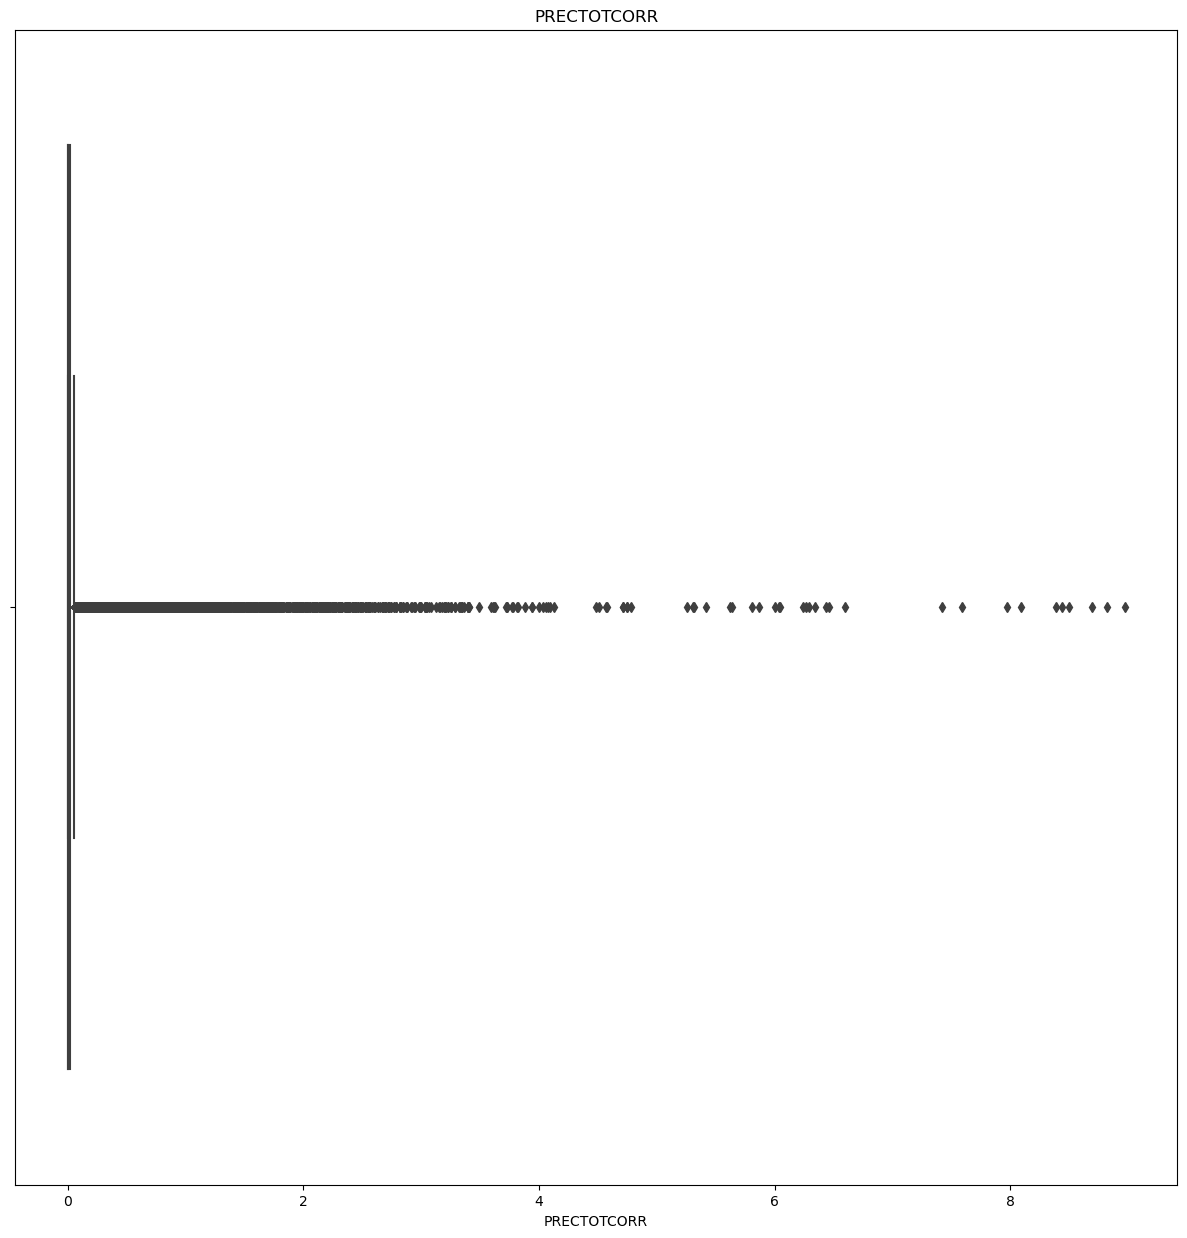

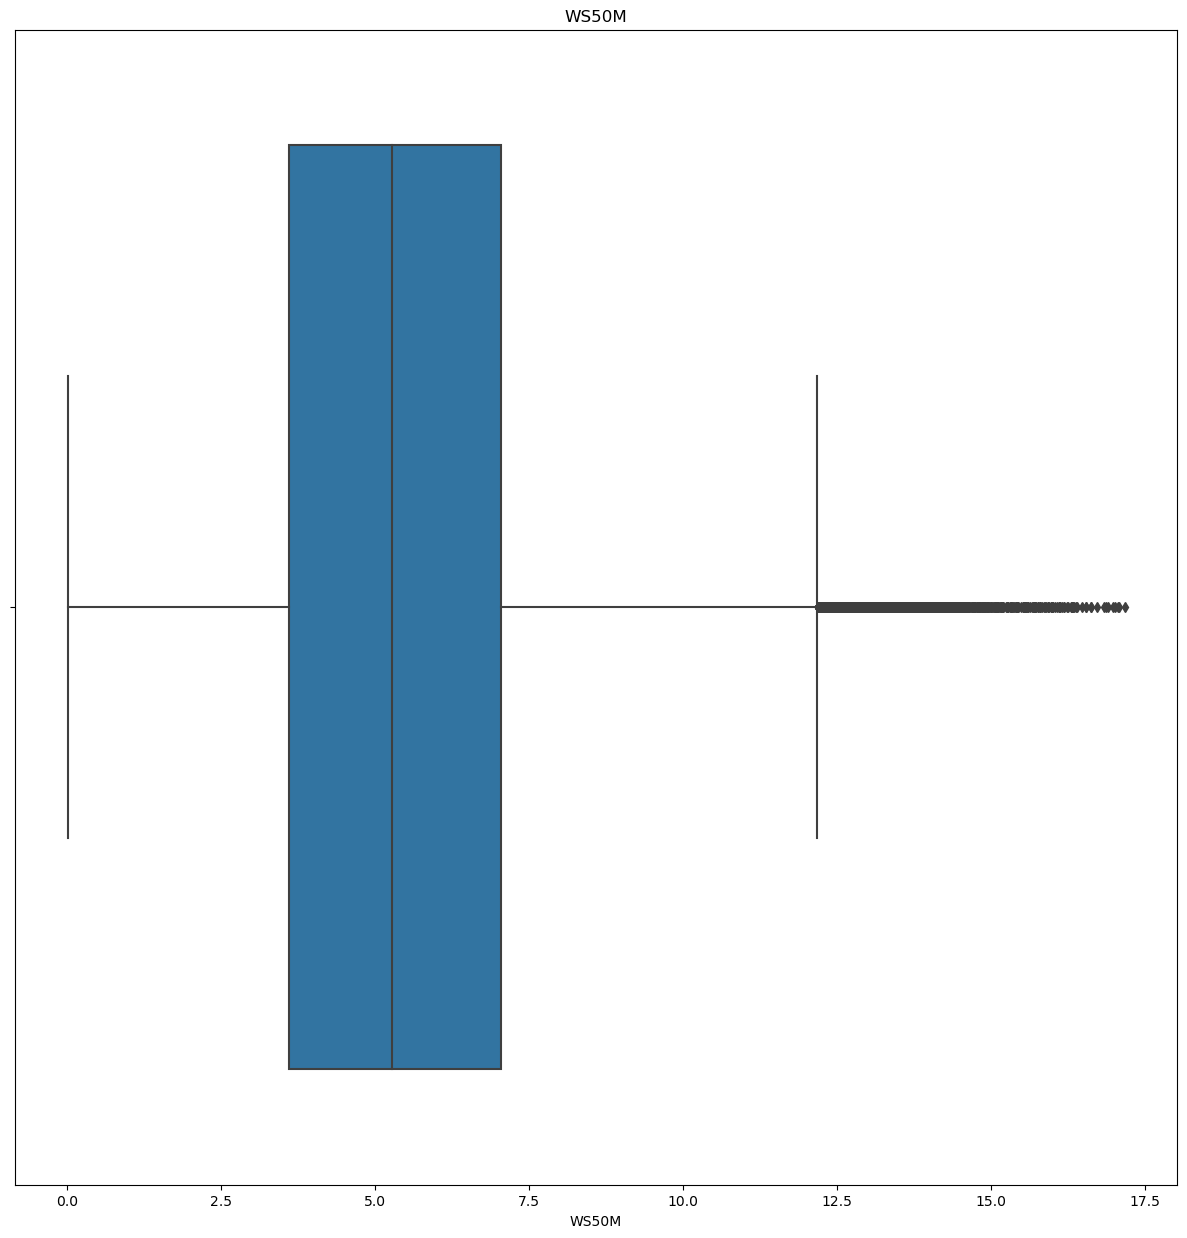

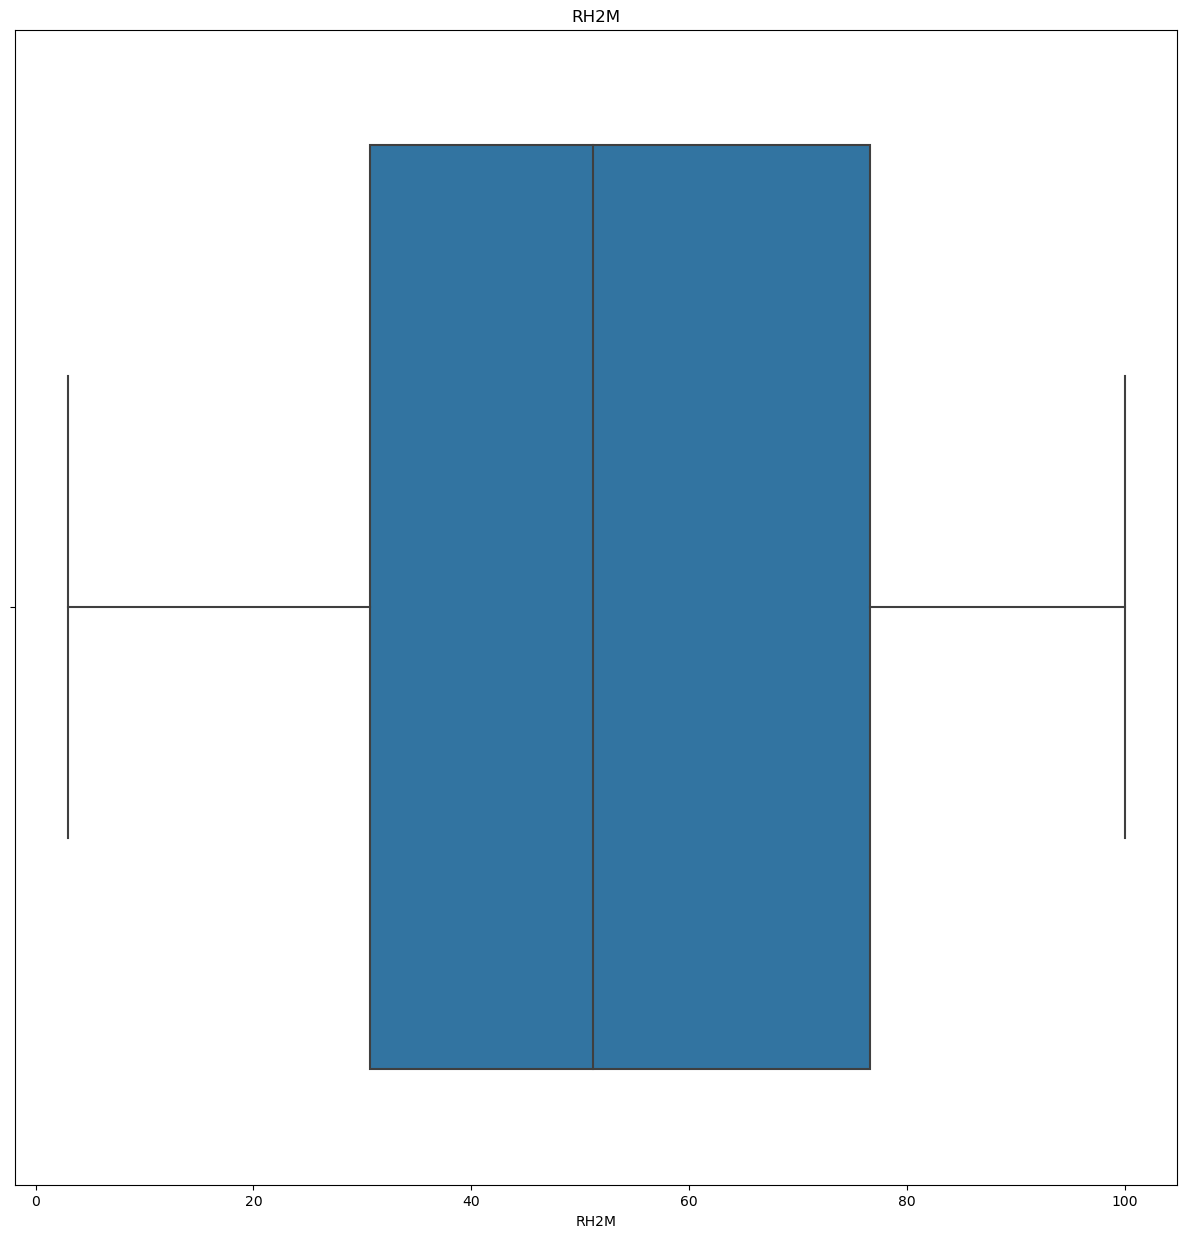

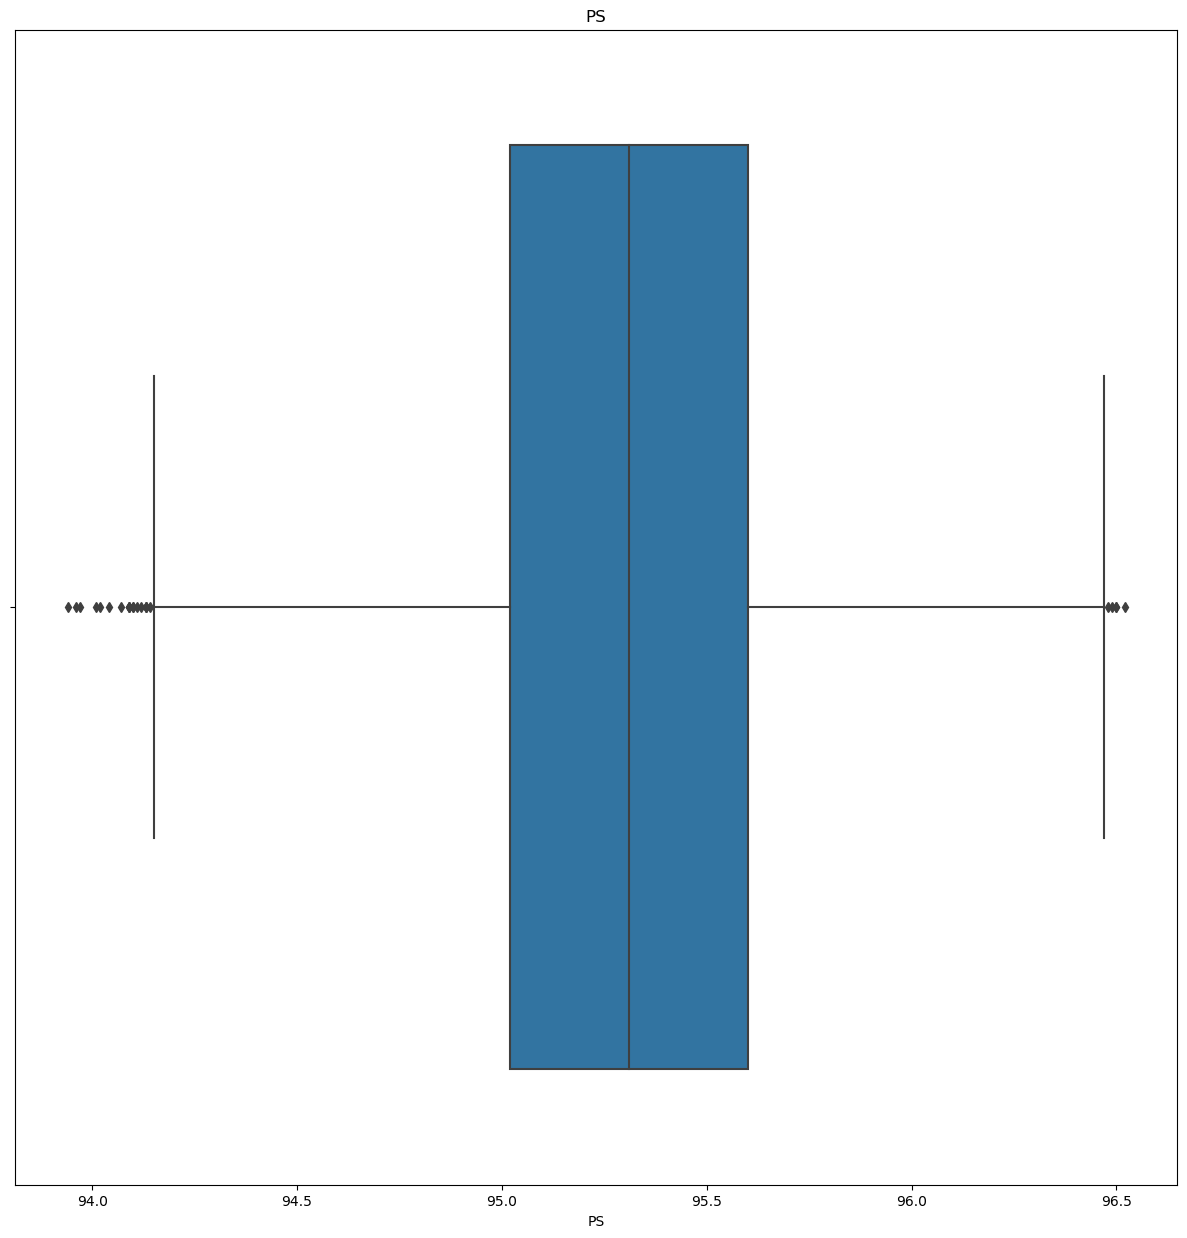

<Figure size 1500x1500 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
d=df.copy()

In [13]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS50M"].unique()))


[20.89 22.65 26.19 ... 13.68 12.34 12.44]
<class 'numpy.ndarray'>
[0.   0.03 0.06 0.08 0.1  0.13 0.16 0.19 0.22 0.21 0.01 0.04 0.02 0.11
 0.12 0.18 0.07 0.17 0.31 0.41 0.4  0.38 0.09 0.15 0.42 0.5  0.61 0.51
 0.32 0.05 1.19 1.27 1.42 1.23 0.81 0.49 0.27 0.3  0.43 0.53 0.58 0.73
 0.62 0.54 0.23 0.24 0.14 0.46 0.44 0.39 0.26 0.52 0.25 0.55 0.74 0.87
 1.12 1.37 1.48 1.1  0.66 0.33 0.29 0.2  0.28 0.98 1.49 1.76 0.9  0.37
 0.72 0.75 0.7  0.8  1.47 2.32 2.63 1.52 1.   0.45 0.57 0.83 1.04 1.28
 1.86 2.39 2.7  2.77 2.6  2.36 1.16 0.88 0.47 0.56 0.94 1.03 0.34 0.59
 0.35 0.48 0.92 0.97 1.17 2.57 2.82 3.29 2.19 0.68 0.63 0.67 0.64 0.77
 0.6  0.78 1.39 1.41 1.07 0.95 0.71 0.69 0.65 1.33 0.93 0.36 1.29 1.82
 2.13 1.73 1.09 1.64 1.67 1.15 0.76 1.14 1.45 0.99 0.82 1.01 1.08 0.84
 1.91 1.5  1.34 1.63 2.17 2.21 2.53 2.56 2.68 2.5  1.98 1.59 1.43 1.71
 2.02 3.25 4.09 2.51 1.74 1.62 0.86 0.91 1.06 0.96 1.05 1.13 1.22 1.56
 0.85 0.79 0.89 1.25 1.58 1.95 2.27 2.11 1.53 1.31 1.69 1.44 1.24 1.02
 1.11 1.35 

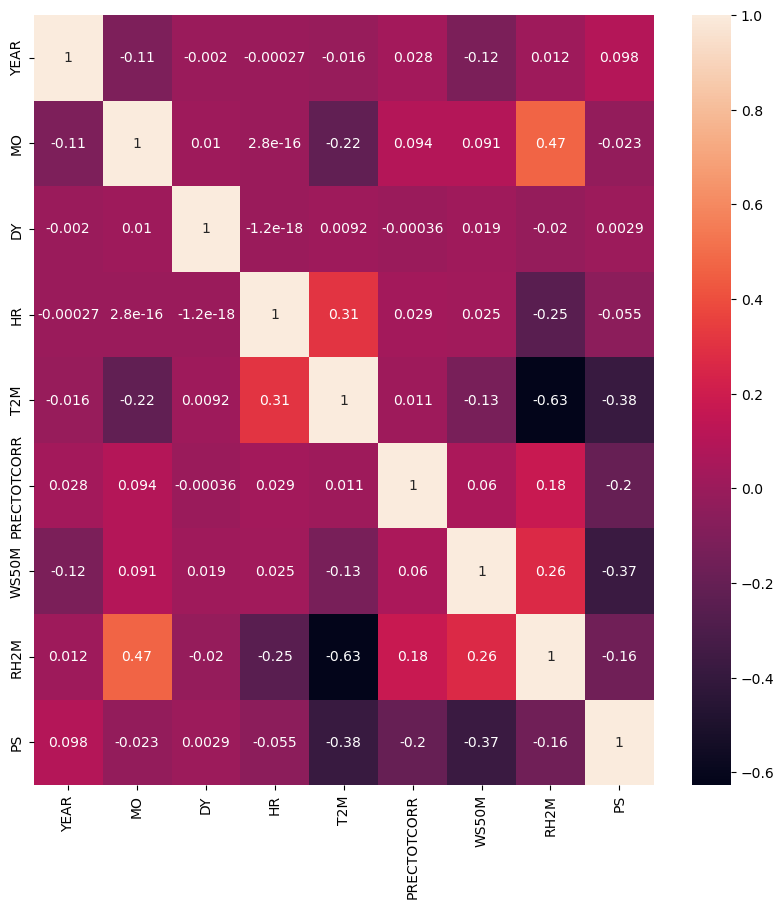

In [14]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [15]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


T2M


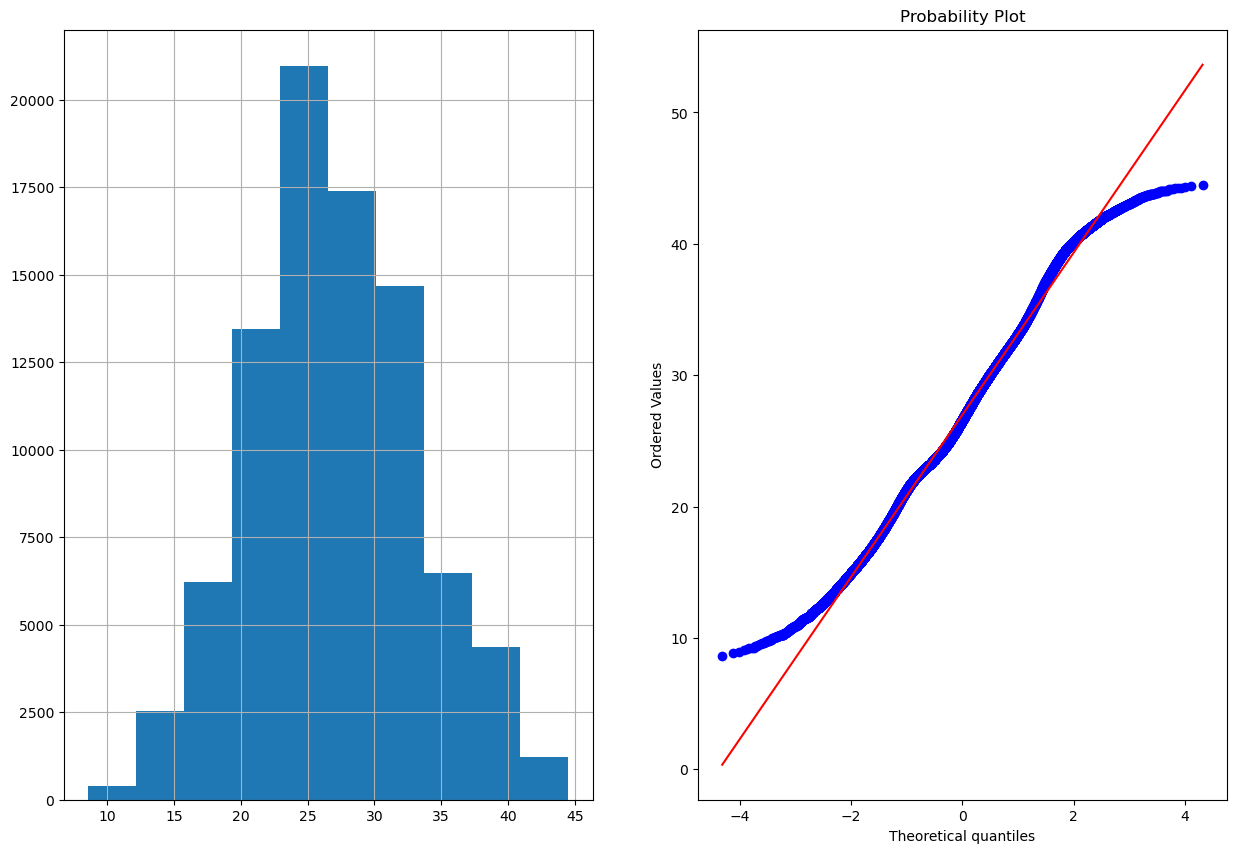

PRECTOTCORR


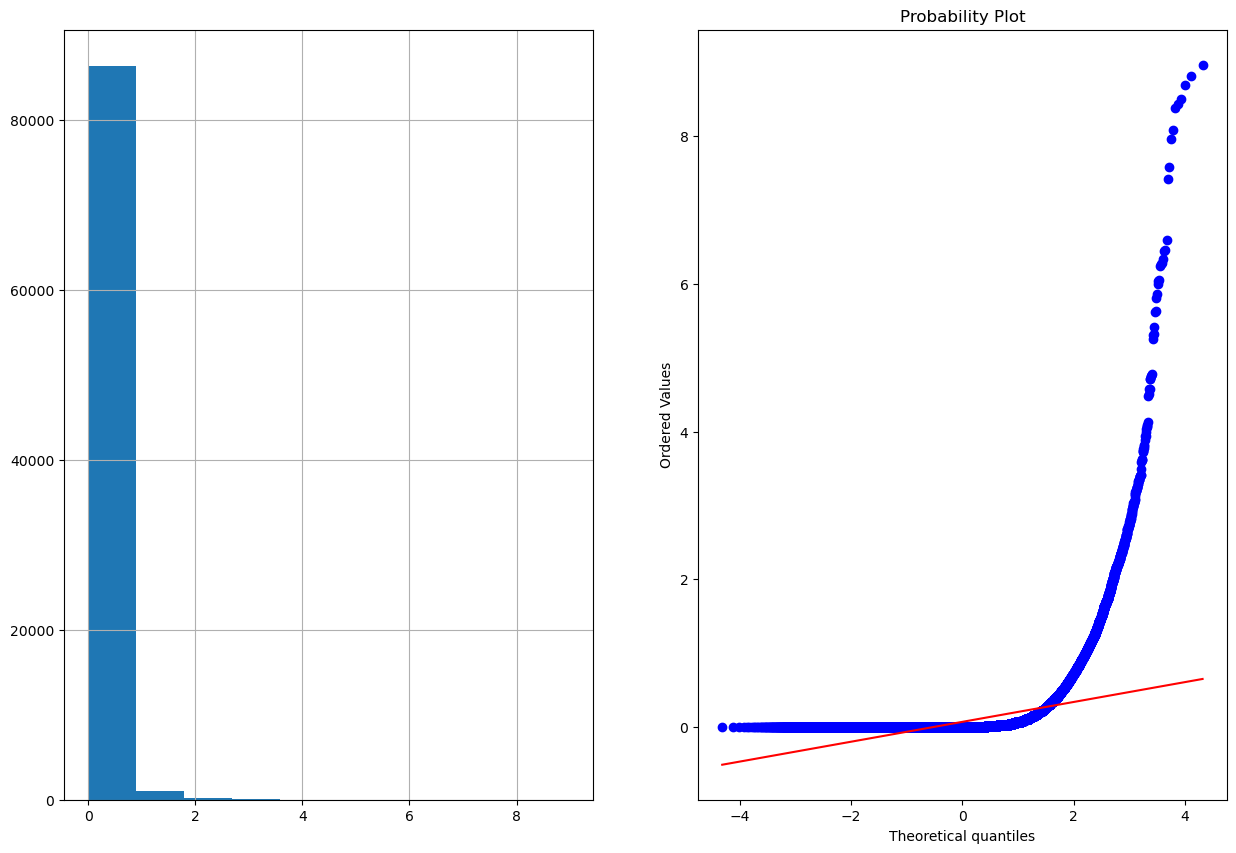

WS50M


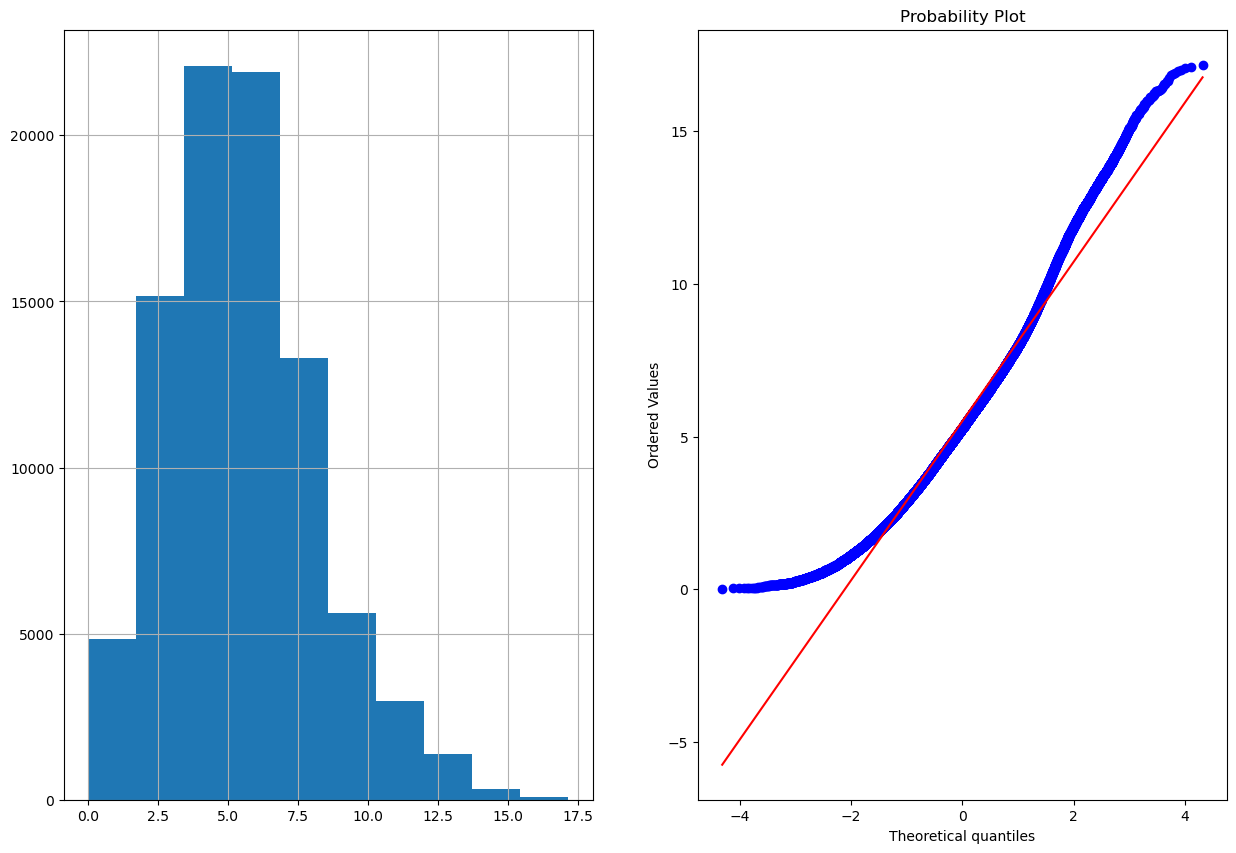

RH2M


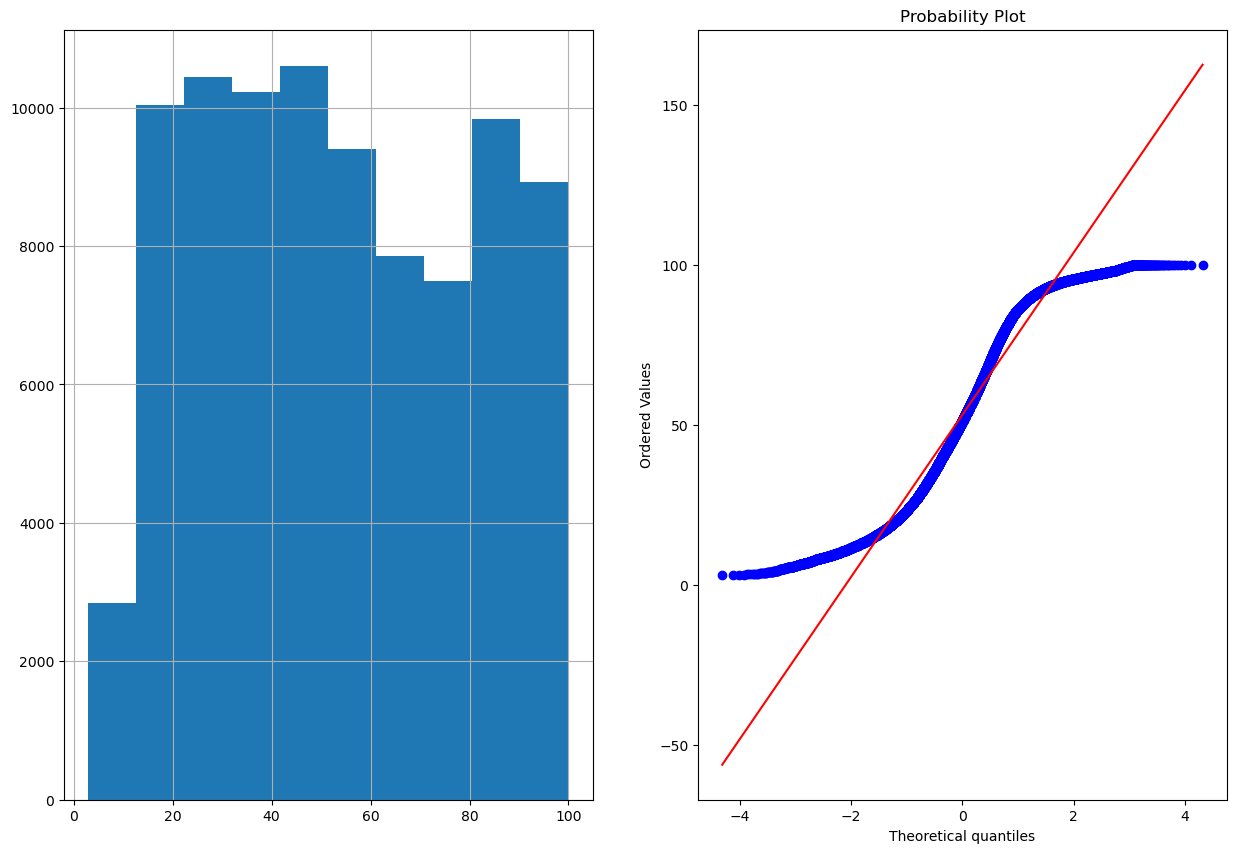

PS


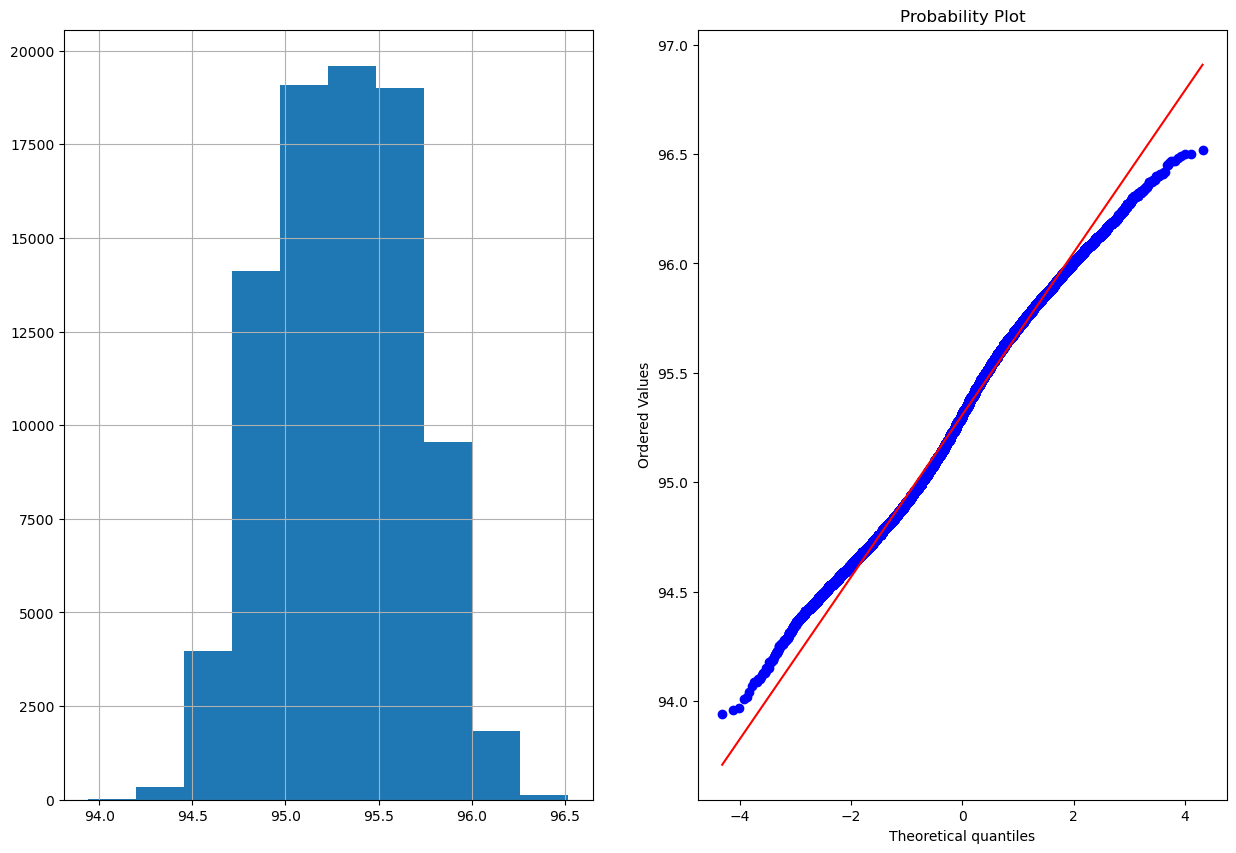

In [16]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [17]:
d.PRECTOTCORR.unique()


array([0.  , 0.03, 0.06, 0.08, 0.1 , 0.13, 0.16, 0.19, 0.22, 0.21, 0.01,
       0.04, 0.02, 0.11, 0.12, 0.18, 0.07, 0.17, 0.31, 0.41, 0.4 , 0.38,
       0.09, 0.15, 0.42, 0.5 , 0.61, 0.51, 0.32, 0.05, 1.19, 1.27, 1.42,
       1.23, 0.81, 0.49, 0.27, 0.3 , 0.43, 0.53, 0.58, 0.73, 0.62, 0.54,
       0.23, 0.24, 0.14, 0.46, 0.44, 0.39, 0.26, 0.52, 0.25, 0.55, 0.74,
       0.87, 1.12, 1.37, 1.48, 1.1 , 0.66, 0.33, 0.29, 0.2 , 0.28, 0.98,
       1.49, 1.76, 0.9 , 0.37, 0.72, 0.75, 0.7 , 0.8 , 1.47, 2.32, 2.63,
       1.52, 1.  , 0.45, 0.57, 0.83, 1.04, 1.28, 1.86, 2.39, 2.7 , 2.77,
       2.6 , 2.36, 1.16, 0.88, 0.47, 0.56, 0.94, 1.03, 0.34, 0.59, 0.35,
       0.48, 0.92, 0.97, 1.17, 2.57, 2.82, 3.29, 2.19, 0.68, 0.63, 0.67,
       0.64, 0.77, 0.6 , 0.78, 1.39, 1.41, 1.07, 0.95, 0.71, 0.69, 0.65,
       1.33, 0.93, 0.36, 1.29, 1.82, 2.13, 1.73, 1.09, 1.64, 1.67, 1.15,
       0.76, 1.14, 1.45, 0.99, 0.82, 1.01, 1.08, 0.84, 1.91, 1.5 , 1.34,
       1.63, 2.17, 2.21, 2.53, 2.56, 2.68, 2.5 , 1.

In [18]:
d1=d.copy()

In [19]:

d1=d1.PRECTOTCORR.map({0:1})

In [20]:
d2=d1.replace(np.nan, 0)

In [21]:
d2.unique()


array([1., 0.])

In [22]:
d3=d['T2M']

In [23]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,20.89,1.0
1,22.65,1.0
2,26.19,1.0
3,31.99,1.0
4,34.87,1.0
...,...,...
87667,24.43,1.0
87668,23.72,1.0
87669,23.22,1.0
87670,22.69,1.0


In [24]:
d5=d['HR'].copy()

In [25]:
d6 = pd.concat([d4, d5], axis=1, join='inner')
display(d6)


,T2M,PRECTOTCORR,HR
0,20.89,1.0,5
1,22.65,1.0,6
2,26.19,1.0,7
3,31.99,1.0,8
4,34.87,1.0,9
...,...,...,...
87667,24.43,1.0,0
87668,23.72,1.0,1
87669,23.22,1.0,2
87670,22.69,1.0,3


In [26]:
d7=d['DY']

In [27]:
d8=d['MO']

In [28]:
d9=d['YEAR']

In [29]:
d10 = pd.concat([d6, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,HR,DY
0,20.89,1.0,5,1
1,22.65,1.0,6,1
2,26.19,1.0,7,1
3,31.99,1.0,8,1
4,34.87,1.0,9,1
...,...,...,...,...
87667,24.43,1.0,0,1
87668,23.72,1.0,1,1
87669,23.22,1.0,2,1
87670,22.69,1.0,3,1


In [30]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,HR,DY,MO
0,20.89,1.0,5,1,4
1,22.65,1.0,6,1,4
2,26.19,1.0,7,1,4
3,31.99,1.0,8,1,4
4,34.87,1.0,9,1,4
...,...,...,...,...,...
87667,24.43,1.0,0,1,4
87668,23.72,1.0,1,1,4
87669,23.22,1.0,2,1,4
87670,22.69,1.0,3,1,4


In [31]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,20.89,1.0,5,1,4,2011
1,22.65,1.0,6,1,4,2011
2,26.19,1.0,7,1,4,2011
3,31.99,1.0,8,1,4,2011
4,34.87,1.0,9,1,4,2011
...,...,...,...,...,...,...
87667,24.43,1.0,0,1,4,2021
87668,23.72,1.0,1,1,4,2021
87669,23.22,1.0,2,1,4,2021
87670,22.69,1.0,3,1,4,2021


In [32]:
d12

,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,20.89,1.0,5,1,4,2011
1,22.65,1.0,6,1,4,2011
2,26.19,1.0,7,1,4,2011
3,31.99,1.0,8,1,4,2011
4,34.87,1.0,9,1,4,2011
...,...,...,...,...,...,...
87667,24.43,1.0,0,1,4,2021
87668,23.72,1.0,1,1,4,2021
87669,23.22,1.0,2,1,4,2021
87670,22.69,1.0,3,1,4,2021


In [33]:
d12['PRECTOTCORR'].unique()

array([1., 0.])

In [34]:
d13=d['RH2M'].copy()

In [35]:
d14=d['WS50M'].copy()

In [36]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M
0,20.89,1.0,5,1,4,2011,29.81
1,22.65,1.0,6,1,4,2011,26.75
2,26.19,1.0,7,1,4,2011,21.19
3,31.99,1.0,8,1,4,2011,13.12
4,34.87,1.0,9,1,4,2011,11.19
...,...,...,...,...,...,...,...
87667,24.43,1.0,0,1,4,2021,32.38
87668,23.72,1.0,1,1,4,2021,42.56
87669,23.22,1.0,2,1,4,2021,50.50
87670,22.69,1.0,3,1,4,2021,56.00


In [37]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M
0,20.89,1.0,5,1,4,2011,29.81,5.45
1,22.65,1.0,6,1,4,2011,26.75,4.56
2,26.19,1.0,7,1,4,2011,21.19,3.39
3,31.99,1.0,8,1,4,2011,13.12,4.00
4,34.87,1.0,9,1,4,2011,11.19,3.01
...,...,...,...,...,...,...,...,...
87667,24.43,1.0,0,1,4,2021,32.38,9.83
87668,23.72,1.0,1,1,4,2021,42.56,9.33
87669,23.22,1.0,2,1,4,2021,50.50,8.53
87670,22.69,1.0,3,1,4,2021,56.00,7.67


In [38]:
d17=d['WS50M'].copy()

In [39]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,20.89,1.0,5,1,4,2011,29.81,5.45,5.45
1,22.65,1.0,6,1,4,2011,26.75,4.56,4.56
2,26.19,1.0,7,1,4,2011,21.19,3.39,3.39
3,31.99,1.0,8,1,4,2011,13.12,4.00,4.00
4,34.87,1.0,9,1,4,2011,11.19,3.01,3.01
...,...,...,...,...,...,...,...,...,...
87667,24.43,1.0,0,1,4,2021,32.38,9.83,9.83
87668,23.72,1.0,1,1,4,2021,42.56,9.33,9.33
87669,23.22,1.0,2,1,4,2021,50.50,8.53,8.53
87670,22.69,1.0,3,1,4,2021,56.00,7.67,7.67


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

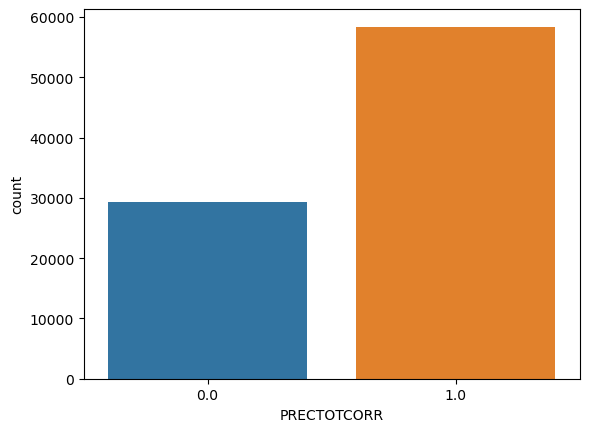

In [40]:
sns.countplot(d18["PRECTOTCORR"])

In [41]:
d18.to_csv("Solapur-1.csv")

In [42]:
d18

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,20.89,1.0,5,1,4,2011,29.81,5.45,5.45
1,22.65,1.0,6,1,4,2011,26.75,4.56,4.56
2,26.19,1.0,7,1,4,2011,21.19,3.39,3.39
3,31.99,1.0,8,1,4,2011,13.12,4.00,4.00
4,34.87,1.0,9,1,4,2011,11.19,3.01,3.01
...,...,...,...,...,...,...,...,...,...
87667,24.43,1.0,0,1,4,2021,32.38,9.83,9.83
87668,23.72,1.0,1,1,4,2021,42.56,9.33,9.33
87669,23.22,1.0,2,1,4,2021,50.50,8.53,8.53
87670,22.69,1.0,3,1,4,2021,56.00,7.67,7.67
